<a href="https://colab.research.google.com/github/aaraszewska/F1-Race-Performance-Analysis-Driver-Insights-/blob/main/Copy_of_F1_Race_Performance_Analysis_%26_Driver_Insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Data Collection
Primary Data Sources:

Ergast API (historical race data, lap times, driver standings)

OpenF1 API (real-time telemetry, driver stats, race results)

Formula 1 Website: For additional stats and current race results (scraping with BeautifulSoup/Selenium)





 Step 1: Install & Import Required Libraries

In [12]:
import requests  # For API calls
import pandas as pd  # For data processing
import json  # For handling JSON data


# Round 1 (Bahrain GP) in 2024.

In [13]:
# API endpoint for Bahrain Grand Prix 2024 (Round 1)
url = "https://ergast.com/api/f1/2024/1/results.json"

# Make the API request
response = requests.get(url)

# Convert the response to JSON
data = response.json()

# Pretty-print the JSON (optional)
print(json.dumps(data, indent=4))


{
    "MRData": {
        "xmlns": "http://ergast.com/mrd/1.5",
        "series": "f1",
        "url": "http://ergast.com/api/f1/2024/1/results.json",
        "limit": "30",
        "offset": "0",
        "total": "20",
        "RaceTable": {
            "season": "2024",
            "round": "1",
            "Races": [
                {
                    "season": "2024",
                    "round": "1",
                    "url": "https://en.wikipedia.org/wiki/2024_Bahrain_Grand_Prix",
                    "raceName": "Bahrain Grand Prix",
                    "Circuit": {
                        "circuitId": "bahrain",
                        "url": "http://en.wikipedia.org/wiki/Bahrain_International_Circuit",
                        "circuitName": "Bahrain International Circuit",
                        "Location": {
                            "lat": "26.0325",
                            "long": "50.5106",
                            "locality": "Sakhir",
                       

 # Extract Useful Data & Convert to DataFrame

In [14]:
# Extract race data
races = data['MRData']['RaceTable']['Races']

# Check if race data is available
if races:
    race_results = races[0]['Results']  # Get race results

    # Create a DataFrame with useful data
    df = pd.DataFrame([
        {
            'Position': result['position'],
            'Driver': f"{result['Driver']['givenName']} {result['Driver']['familyName']}",
            'Constructor': result['Constructor']['name'],
            'Time': result.get('Time', {}).get('time', 'N/A'),  # Some drivers may not have a time
            'Points': result['points']
        }
        for result in race_results
    ])

    # Display the first few rows
    print(df.head())
else:
    print("No race data available.")


  Position           Driver Constructor         Time Points
0        1   Max Verstappen    Red Bull  1:31:44.742     26
1        2     Sergio Pérez    Red Bull      +22.457     18
2        3     Carlos Sainz     Ferrari      +25.110     15
3        4  Charles Leclerc     Ferrari      +39.669     12
4        5   George Russell    Mercedes      +46.788     10


# Save Data to CSV

In [15]:
df.to_csv('f1_race_results.csv', index=False)


<ipython-input-16-8b7e94a18bd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Points', y='Driver', data=df_sorted, palette='magma')


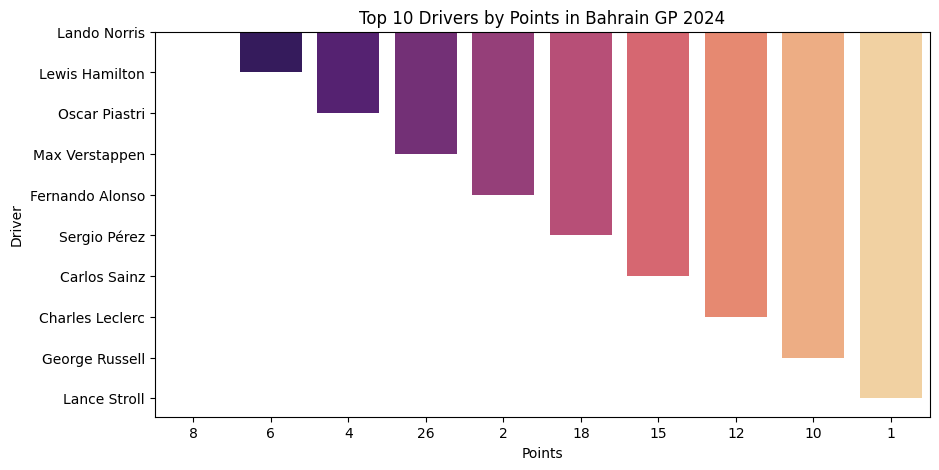

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by points
df_sorted = df.sort_values(by='Points', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Points', y='Driver', data=df_sorted, palette='magma')
plt.xlabel("Points")
plt.ylabel("Driver")
plt.title("Top 10 Drivers by Points in Bahrain GP 2024")
plt.show()
